# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
based_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define lists for the DataFrame
city_index = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

print("Beginning Data Retrieval\n------------------------------\n")
s = 0
i = 1
for city in cities:
    try:
        response = requests.get(based_url + "q=" + city + "&units=Imperial&appid=" + api_key).json()
        cloudinesses.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        
        if s > 48:
            s = 1
            i += 1
            city_index.append(city)
        else:
            s += 1
            city_index.append(city)
        
        print(f"Processing Record {i} of Set {s} | {city}")
    
    except Exception:
        print("City not found. Skipping...")

print("------------------------------\nData Retrieval Complete\n------------------------------")
            

Beginning Data Retrieval
------------------------------

Processing Record 1 of Set 1 | butaritari
City not found. Skipping...
Processing Record 1 of Set 2 | rawson
Processing Record 1 of Set 3 | ancud
Processing Record 1 of Set 4 | busselton
Processing Record 1 of Set 5 | kozhva
Processing Record 1 of Set 6 | soure
Processing Record 1 of Set 7 | pangnirtung
Processing Record 1 of Set 8 | egvekinot
Processing Record 1 of Set 9 | tiksi
Processing Record 1 of Set 10 | lavrentiya
Processing Record 1 of Set 11 | hermanus
Processing Record 1 of Set 12 | mar del plata
Processing Record 1 of Set 13 | puerto ayora
Processing Record 1 of Set 14 | rikitea
Processing Record 1 of Set 15 | ushuaia
Processing Record 1 of Set 16 | cape town
Processing Record 1 of Set 17 | sampang
Processing Record 1 of Set 18 | clarksburg
Processing Record 1 of Set 19 | manokwari
City not found. Skipping...
Processing Record 1 of Set 20 | general roca
Processing Record 1 of Set 21 | hobart
Processing Record 1 of Set 

Processing Record 4 of Set 38 | pavullo nel frignano
Processing Record 4 of Set 39 | isiro
Processing Record 4 of Set 40 | tautira
Processing Record 4 of Set 41 | avare
Processing Record 4 of Set 42 | castro
Processing Record 4 of Set 43 | ocampo
Processing Record 4 of Set 44 | tiarei
Processing Record 4 of Set 45 | kalanguy
Processing Record 4 of Set 46 | qandala
Processing Record 4 of Set 47 | cheney
Processing Record 4 of Set 48 | little current
City not found. Skipping...
Processing Record 4 of Set 49 | bitung
Processing Record 5 of Set 1 | talara
Processing Record 5 of Set 2 | puerto escondido
Processing Record 5 of Set 3 | namatanai
Processing Record 5 of Set 4 | anadyr
Processing Record 5 of Set 5 | cidreira
Processing Record 5 of Set 6 | port lincoln
Processing Record 5 of Set 7 | hami
Processing Record 5 of Set 8 | meridian
City not found. Skipping...
Processing Record 5 of Set 9 | yumen
Processing Record 5 of Set 10 | san antonio
Processing Record 5 of Set 11 | bemidji
Proces

Processing Record 8 of Set 30 | lokosovo
Processing Record 8 of Set 31 | norfolk
Processing Record 8 of Set 32 | souillac
City not found. Skipping...
Processing Record 8 of Set 33 | san quintin
Processing Record 8 of Set 34 | aksu
Processing Record 8 of Set 35 | umm kaddadah
Processing Record 8 of Set 36 | saint-augustin
Processing Record 8 of Set 37 | imeni babushkina
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 38 | garbolovo
Processing Record 8 of Set 39 | chokurdakh
Processing Record 8 of Set 40 | kromy
Processing Record 8 of Set 41 | brigantine
Processing Record 8 of Set 42 | pisco
Processing Record 8 of Set 43 | saldanha
Processing Record 8 of Set 44 | tiznit
Processing Record 8 of Set 45 | amapa
Processing Record 8 of Set 46 | port hedland
Processing Record 8 of Set 47 | antalaha
Processing Record 8 of Set 48 | hauterive
Processing Record 8 of Set 49 | zalantun
Processing Record 9 of Set 1 | shingu
Processing Record 9 of Set 2 | mulhouse
Pro

In [7]:
# creat a weather DataFrame
weather = {"City": city_index, 
        "Cloudiness":cloudinesses,
        "Country":countries,
        "Date":dates,
        "Humidity":humidities,
        "Lat":lats,
        "Lng":lngs,
        "Max Temp":max_temps,
        "Wind Speed":wind_speeds}

weather_df = pd.DataFrame(weather)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [9]:
# Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,92,KI,1554359076,100,3.07,172.79,77.09,3.18
1,rawson,0,AR,1554359066,47,-43.30,-65.11,55.22,15.26
2,ancud,75,CL,1554357600,70,-41.87,-73.83,46.40,10.29
3,busselton,32,AU,1554358808,34,-33.64,115.35,70.00,25.88
4,kozhva,20,RU,1554359171,92,65.11,57.05,34.70,5.41


In [11]:
# Export the city data into a .csv
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

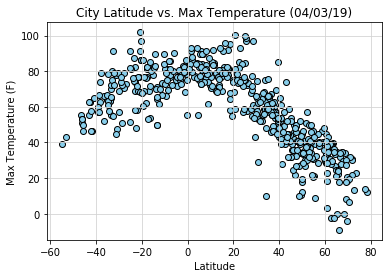

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (04/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

plt.savefig("LatitudevsTemperature.png")

#### Latitude vs. Humidity Plot

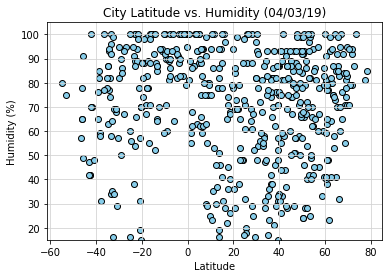

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.ylim(15,105)
plt.title("City Latitude vs. Humidity (04/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

plt.savefig("LatitudevsHumidity.png")

#### Latitude vs. Cloudiness Plot

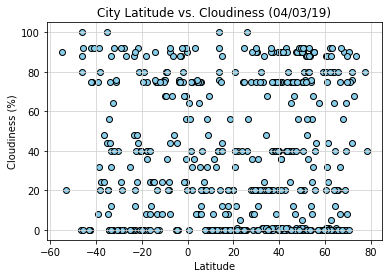

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (04/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

plt.savefig("LatitudevsCloudiness.png")

#### Latitude vs. Wind Speed Plot

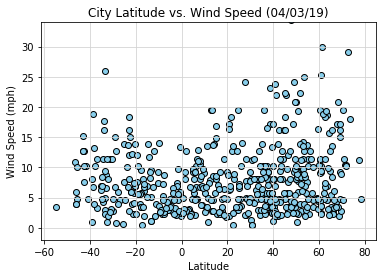

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.ylim(-2,34)
plt.title("City Latitude vs. Wind Speed (04/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

plt.savefig("LatitudevsWind Speed")